EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 1**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Catalina Aránguiz`
  - `# Maykol Medrano C.`
- Usuario de GitHub (opcional):  `# MaykolMedrano`
`# caranguizc`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 4 de abril a las 18:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    3    |
| Pregunta 1.2                   |    3    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    2    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    5    |
| Pregunta 1.8                   |   7    |
| Pregunta 1.9                   |   5    |
| Pregunta 1.10                  |   5    |
| Pregunta 1.11                  |   6    |
| Pregunta 1.12                  |    2    |
| Pregunta 1.13                  |    5    |
| Pregunta 1.14                  |   10    |
| Pregunta 1.15                  |    5    |
| Pregunta 1.16                  |    5    |
| Pregunta 2.0                   |    2    |
| Pregunta 2.1                   |    5    |
| Pregunta 2.2                   |    5    |
| Pregunta 2.3                   |    5    |
| Pregunta 2.4                   |    3    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    2    |
| Pregunta 2.7                   |    2    |

Total: 100 pts.


### Sobre el Bonus

- La entrega, por defecto, es a través de Canvas. Sin embargo, puede escoger voluntariamente entregar la tarea en su GitHub personal.

- Si usted realiza la entrega en GitHub antes de la **fecha y hora indicada**, entonces tendrá una bonificación de 0.3 en su nota final de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub, entonces su calificación en esta tarea será de 6.8.

- Si **además** de realizar la entrega a través de GitHub, usted logra crear `branches` (ramas) y realizar un `merge` entre ramas, entonces se le bonificará con 0.5 en su nota de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub e hizo el trabajo de ramas, entonces su calificación en esta tarea será de 7.0.

  - Se valora capacidad autodidacta.
  - Sólo serán considerados los archivos contenidos en su rama principal a la fecha y hora indicada.



## Exploratory data analysis (EDA)

Para esta tarea se utilizará como principal fuente de información un dataset con una serie de características económicas, demográficas y de desarrollo humano de distintos países a la fecha de 2007 (corte transversal). El dataset está disponible en el siguiente [Github](https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv).<br>

Descripción del dataset:

Variables:

*   date: Fecha en la que se actualizó la data.
*   Population, Area (sq. mi.) Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita, Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service: Características del país.
*   source: fuente de los datos.
*   Region: Región (grupo de países).
*   Country: País.

### Pregunta 1.0

Importe las librerías que usará en su tarea.

In [98]:
#Cargamos librerias a usar

# Librerias para manipulación de DataFrames
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

# Libreríaa para gráficas
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Librería que filtra warnings innecesarios
import warnings
warnings.filterwarnings("ignore")

### Pregunta 1.1

Importe el dataset como un DataFrame (df) directamente desde Github (es decir, no descargue el archivo manualmente). A lo largo de la tarea este df se denominará como `df`.


In [99]:
# Cargamos
url = 'https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv'
df  = pd.read_csv(url)
df

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,US Goverment,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,US Goverment,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,US Goverment,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,US Goverment,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,US Goverment,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2007-01-01,US Goverment,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,US Goverment,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,US Goverment,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,US Goverment,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


### Pregunta 1.2

Utilice las funciones de Pandas `head()`, `tail()`, `info()` y la propiedad (o atributo) `.dtypes` para describir el `df`. Explique brevemente para qué sirve cada función.

In [100]:
# Para poder visualizar las cinco (default) primeras observaciones de nuestro DataFrame usamos la función head()
df.head()

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,US Goverment,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,US Goverment,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,US Goverment,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,US Goverment,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,US Goverment,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [101]:
# Para poder visualizar las cinco ultimas (default) observaciones de nuestro DataFrame usamos la función head()
df.tail()

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,2007-01-01,US Goverment,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,US Goverment,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,US Goverment,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,US Goverment,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,2007-01-01,US Goverment,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,...,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [102]:
# Para poder conocer la metadata de nuestro DataFrame usamos la función info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                227 non-null    object 
 1   source                              227 non-null    object 
 2   Country                             227 non-null    object 
 3   Region                              227 non-null    object 
 4   Population                          227 non-null    int64  
 5   Area (sq. mi.)                      227 non-null    int64  
 6   Pop. Density (per sq. mi.)          227 non-null    float64
 7   Coastline (coast/area ratio)        227 non-null    float64
 8   Net migration                       224 non-null    float64
 9   Infant mortality (per 1000 births)  224 non-null    float64
 10  GDP ($ per capita)                  226 non-null    float64
 11  Literacy (%)                        209 non-n

In [103]:
# Si estamos interesado en poder conocer el tipo de objeto de nuetras columnas (tipo de variables) del DataFrame usamos la función .dtypes
df.dtypes

,0
date,object
source,object
Country,object
Region,object
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64


### Pregunta 1.3

La variable `source` es innecesaria debido que contiene el mismo valor para todas las observaciones. Elimine esta variable de su `df`.

In [104]:
 # Usamos la función drop() para eliminar una columna especifica en nuestro df, en este caso "source".
df = df.drop(columns=['source'])
df

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2007-01-01,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


### Pregunta 1.4

Transforme el tipo de la variable `date` a `datetime` _datatype_.

In [105]:
# Formateamos la columna "Date"
df['Country'] = df['Country'].str.rstrip()  # Elimanos espacio en blanco al final del string
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d").dt.year
df.dtypes

,0
date,int32
Country,object
Region,object
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64
GDP ($ per capita),float64


### Pregunta 1.5

Para determinar si las variables son "útiles" y sus valores son "correctos" es necesario comprender cada uno de los atributos del dataset.
Investigue y explique brevemente la relación **teórica** entre el `GDP (% per capita)` y cada una de las variables denominadas como "Características del país" en la introducción.

Ejemplo: Existe una variable denominada `Coastline (coast/area ratio)`. Coastline es una medida de la cantidad de costa (acceso a mar) del país normalizada al área total del país para no beneficiar a países más grandes pero con la misma proporción de costa. A mayor "Costline" aumenta la capacidad portuaria per capita del país, más puertos facilita el comercio y podría aumentar el GDP per cápita.




---

*   **Population**: Es el numero de personas que habitan un pais, la variacion del PIB per capita es igual a la tasa de crecimiento del PIB dividida entre la tasa de crecimiento de la poblacion, si la poblacion crece mas rapido que el PIB, el PIB per capita disminuira.

*  **Area** : Es la extension de la superficie de tierra que pertenece a un pais medida en sq. mi, la relacion no es directa, esta podria variar dependiendo del uso que se le de al area, si en el area es rico en recursos, o si le permite tener mayor produccion, puede ser tambien que en brasil por ejemplo cubre una gran area de tierra pero hay zonas en la amazonas que no puede ser habitadas por el peligro, la preservacion de la naturaleza y/o comunidades. Es utilizada para calcular la densidad de poblacion.

*   **Pop. Density**: Es la cantidad de poblacion dividida en la unidad de superficie (per sq.mi). No explicaria el PIB per capita debido que este puede ser relativo, por ejemplo Japon es de alta densidad y alto PIB per capita, y EE.UU es de baja densidad y alto PIB per capita, la relacion dependeria de otras variables.

*   **Net migration:** Es numerode inmigrantes menos el numero de emigrantes durante un periodo (2007). No hay una relacion directa, lo que importa al parece es como la migracion interactua con l estructura economica y las instituciones y el pais domestico.

*  **Infant Mortality:** Es el numero de muertes de ninos menores de un ano por cada 1000 nacidos vivos en un ano determinado. Se utiliza como indicador de salud publica y el desarrollo socioeconomico de un pais. Segun estudios se dice que existe correlacion negativa entre PIB per capita y mortalidad infantil, a medida que aumenta el ingreso promedio, la mortalidad infantil disminuye.

*  **Literacy:** Mide el porcentaje de personas mayores de una cierta edad que pueden leer, escribir y comprender textos simples en su vida diaria. Es un indicador clave de capital humano y desarrollo educativo de un pais. Existe una relacion positiva entre literacy y el PIB per capita, pero puede ser que se explique entre la una y la otra, es decir un pais puede invertir mucho en educacion y es por eso que tiene un gran pib per capita, o es porque tiene un gran pib que pueden invertir en educacion.

*   **Phones:** Es una metrica que se usa como proxy de penetracion tecnologica y conectividad, cuantos telefonos hay por cada 1000 habitantes. Como el ano de estudio es del 2007 si puede presentar un indicador para medir fuertemente el desarrollo tecnologico y por ende puede tener una relacion con el gdp per capita, a mayor indice de phones, mayor gdp per capita.

*   **Arables:** Se refiere a la tierra apta para cultivos agricolas, se mide como el area total de un pais dividido en hectareas por persona, esta variable tambien depende del contexto economico del pais, ya que si un pais no tiene la tecnologia o recursos suficientes para hacer efectiva su utilizacion no tiene mucha utilidad, hay paises que arables puede tenerlo bajo pero tienen una
 fuerte inversion en tecnologia agricola y tener un PIB per capita mayor.

*   **Crops:** Se refiere a los cultivos agricolas producidos en un pais, como cereales, arroz, maiz, frutas, verduras, etc. por tonelados por ano. Nuevamente no tiene una relacion directa con el PIB per capita, pero si tiene relacion en como se utiliza la produccion, colombia puede vender muchos granos de cafe y ganan poco, los paises que compran estos granos los procesan y ganan aun mas.

*   **Climate:** (revisar en que esta medido). Se refiere a la condiciones atmosfericas promedio de una region  durante un periodo prolongado, incluye
 factores como la temperatura, precipitacion, humedad y los patrones del viento. Este puede afectar en la agricultura, desastres naturales, salud y productividad, emisiones de CO2 entre otras cosas, todos estos factores tambien pueden afectar al gdp per capita, pero no es una relac
ion directa.

*   **Birthrate:** Es la tasa de natalidad,es el numero de nacimientos vivos por cada 1.000 habitantes durante el 2007.
Es un indicador demografico que refleja la capacidad de una poblacion para reproducirse. Esta tiene un relacion con la educacion de las mujeres, a medida que las mujeres tienen mayor educacion tienen menos hijos, el acceso de anticonceptivos puede reducir la natalidad, mayor participacion laboral de mujeres, etc. En general paises con menor natalidad tienden a tener tasas de natalidad mas altas y viceversa. Cuando un pais se desarolla economicamente tiende a experimentar una baja en la tasa de natalidad.

*   **Deathrate:** Es la tasa de mortalidad que se define como el numero de muertes ocurridas por cada 1.000 habitantes en el 2007. Es un indicador de mortalidad de una poblacion. Existe una relacion negativa entre el pib per capita y la tasa de mortalidad, puede ser debido a que paises mas ricos tienen mayor acceso a atencion medica, nivel de vida y educacion.

*   **Agriculture:** (no se en que se mide) La relacion depende de los factores de cada pais, como la tecnologia, comercio, diversificacion, clima, este varia en el contexto de cada pais.

*   **Industry:** Son las actividades economicas que transforman materia primas en productos manufacturados como produccion de alimentos y textiles hasta maquinaria y productos quimicos, entre otros. La relacion deberia ser a mayor numero de industrias entonces el GDP es mayor.

*   **Service:** Actividades economicas que no producen bienes tangibles, a mayor numero de servicios el gdp per capita tiende a aumentar tambien en la misma direccion.

---



### Pregunta 1.6

Calcule estadísticas descriptivas para cada variable numérica.

In [106]:
# Para calcular un resumen estaditico de solamente variables númericas delimitamos con .select_dtypes
df.select_dtypes(include=np.number).describe()

,date,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227.0,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2007.0,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,0.0,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,2007.0,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,2007.0,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,2007.0,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,2007.0,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,2007.0,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Pregunta 1.7

Según corresponda, realice un gráfico de distribución de densidad o histograma para describir 3 variables del `df` que usted crea más relevantes.

¿Por qué es importante analizar las distribuciones de las variables a utilizar en su modelo? Ejemplifique su respuesta con al menos una de las variables del df`.

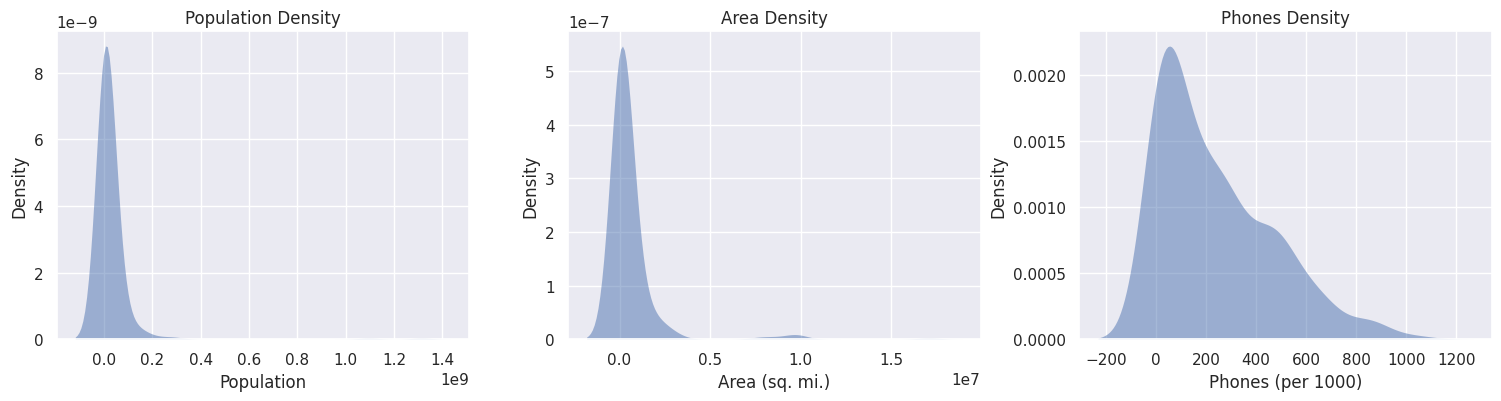

In [107]:
# Seleccionamos tres variables relevantes
pop    = df['Population']
area   = df['Area (sq. mi.)']
phones = df['Phones (per 1000)']

# Definimos las dimensiones de la figura
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

## Usamos kdeplot, de igual forma se puede usar la libreria matplotlib

# Graficamos 'pop'
sns.kdeplot(pop, fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0, ax=axes[0])
axes[0].set_title('Population Density')

# Gráficamos 'area'
sns.kdeplot(area, fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0, ax=axes[1])
axes[1].set_title('Area Density')

# Gráficamos 'phones'
sns.kdeplot(phones, fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0, ax=axes[2])
axes[2].set_title('Phones Density')

# Ajustamos la figura
plt.tight_layout()
plt.show()




---


El analisis de distribuciones de las variables nos permite conocer el tipo de distribución de la variable y detectar presencias de valores extremos (outliers) que pueden afectar los resultados de nuestros modelo.

El grafico de densidad de telefonos, presenta una distribucion sesgada a la derecha con una cola alargada hacia la derecha. lo que nos da indicios de la existencia de valores muy altos (outliers), Estos valores atipicos pueden influir en las estimaciones que realizan más adelante por lo que tienen implicancias en la consitencia de los resultados obtenidos.

---



### Pregunta 1.8

El df contiene variables con missing values (`NaN`). Impute los `NaN` con el método que estime conveniente, justificando su decisión.

¿Es pertinente eliminar alguna de estas variables? Hágalo si es el caso.

In [108]:
#Vericamos que variables tienen missing values (NaN)
miss_value = df.isnull().sum().sort_values(ascending=False)
miss_value

,0
Climate,22
Literacy (%),18
Industry,16
Agriculture,15
Service,15
Deathrate,4
Phones (per 1000),4
Net migration,3
Infant mortality (per 1000 births),3
Birthrate,3


In [109]:
# Ya que tenemos información sobre la región a la cual pertenece el país podemos tomar un promedio según región e inputar la información faltante.
# Imputar cada variable utilizando el promedio regional:

# Columnas identificadas que presentan missing values
columns_missing = ['Climate', 'Literacy (%)', 'Industry', 'Agriculture', 'Service',
             'Deathrate', 'Phones (per 1000)', 'Net migration',
             'Infant mortality (per 1000 births)', 'Birthrate',
             'Other (%)', 'Crops (%)', 'Arable (%)', 'GDP ($ per capita)']

# Imputamos usando la media de de cada región, en los paises faltante
for var in columns_missing:
    df[var] = df[var].fillna(df.groupby('Region')[var].transform('mean'))
df

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060,163.070,700.0,...,3.2,12.13,0.22,87.65,1.0,46.600,20.340,0.380000,0.240000,0.380000
1,2007,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930,21.520,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.110,5.220,0.232000,0.188000,0.579000
2,2007,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390,31.000,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.140,4.610,0.101000,0.600000,0.298000
3,2007,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.710,9.270,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.460,3.270,0.175125,0.215250,0.608938
4,2007,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.600,4.050,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.710,6.250,0.044480,0.246083,0.714625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2007,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.980,19.620,800.0,...,145.2,16.90,18.97,64.13,3.0,31.670,3.920,0.090000,0.280000,0.630000
223,2007,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,-0.432,30.916,5460.0,...,100.2,0.02,0.00,99.98,1.0,20.814,4.806,0.135000,0.426200,0.400000
224,2007,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.000,61.500,800.0,...,37.2,2.78,0.24,96.98,1.0,42.890,8.300,0.135000,0.472000,0.393000
225,2007,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000,88.290,800.0,...,8.2,7.08,0.03,92.90,2.0,41.000,19.930,0.220000,0.290000,0.489000





---


No es necesario eliminar ningun dato de los que presentan missing values, esto es debido que represetan un cantidad pequeña con respecto al número de observaciones, por lo que podemos abordar este problema mediante la imputación mediante la siguiente estrategia: Es posible usar el valor promedio por región e imputar esos valores en los paises donde no se encuentran información, este metodo ayuda a capturar las caracteristicas de los paises pertenecientes a la región.


---


### Pregunta 1.9

¿Cómo distribuye el `GDP ($ per capita)` en diferentes **regiones**? Defina una forma ilustrativa de gráficar el `GDP ($ per capita)` para todas las regiones en un mismo gráfico. Interprételo.

In [110]:
# Graficamos un mapa para ver las distribución por "Countries"
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'], locationmode='country names',
    z=df['GDP ($ per capita)'], text=df['Country'],
    colorscale='Viridis', autocolorscale=False, reversescale=True,
    marker_line_color='darkgray', marker_line_width=0.5,
    colorbar_tickprefix='$', colorbar_title='GDP'
))
fig.update_layout(
    title_text='Distribución del GDP ($ per capita) según paises',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    annotations=[dict(x=0.55, y=0.1, xref='paper', yref='paper', text='', showarrow=False)]
)
fig.show()




---


El mapa cloroplético ilustra la distribución del PIB per cápita por país, se observa que América del Norte presenta niveles significativamente altos de PIB per cápita, especialmente en Estados Unidos y Canadá. En contraste, México exhibe un valor considerablemente menor, alineándose con los niveles intermedios que predominan en América Central y gran parte de América del Sur. Dentro de esta última región, Chile, Argentina y Uruguay destacan como los países con mayores niveles de ingreso per cápita.

En Europa, la mayoría de los países presentan altos niveles de PIB per cápita, particularmente en Europa Occidental y Escandinavia. La Guayana Francesa, al ser un territorio de ultramar de Francia, comparte la misma categoría visual que esta, lo que no refleja de manera representativa la realidad socioeconómica local.

África, especialmente en su región central, muestra los niveles más bajos de PIB per cápita a nivel mundial, con excepción de Sudáfrica, que sobresale con un valor relativamente elevado. Por su parte, Asia presenta una mayor heterogeneidad: mientras Japón y Taiwan, economías del sudeste asiático alcanzan niveles altos, otras regiones mantienen niveles intermedios o bajos.

Finalmente, Australia y Nueva Zelanda se posicionan entre las economías con mayor PIB per cápita, similares a las observadas en América del Norte y Europa Occidental.


---


### Pregunta 1.10

Supongamos que `GDP ($ per capita)` es su variable objetivo. Estudie la correlación de esta variable con el resto de las variables del `df`. ¿Por qué es importante analizar la correlación entre las variables?



In [115]:
# Selecionamos solo variables númericas para correlacionar
df_corr1 = df.select_dtypes(include=np.number).corr()["GDP ($ per capita)"]

#df_corr1 = df_corr1.sort_values(ascending=False).abs()
# Correlacionamos las variables de interes, luego convertimos a valor absoluto para identificar las variables con mayor correlación.
df_corr1 = df_corr1.abs()
df_corr1 = df_corr1.sort_values(ascending=False)
df_corr1[df_corr1.values < 1].head(3)

,GDP ($ per capita)
Phones (per 1000),0.830684
Birthrate,0.643247
Infant mortality (per 1000 births),0.596963




---

Las correlaciones nos permiten observar las asociaciones que existen entre variables cuantitativas. En este caso que variables tiene asociación con el GDP per capita, es decir que variables relevantes de nuestro modelo podrian llegar a explicar la variabilidad del crecimiento de un pais, y ademas podemos observar como estas interactuan es decir de forma negativa o positiva. Se obtuvo que las variables con mayor correlacion fueron:


*   **Phones:** Presenta una fuerte correlacion positiva, es decir paises con mayor acceso telefonicos (proxy de tecnologia) suelen tener mayor PIB per capita.

*   **Birthrate:** La natalidad esta correlacionada negativamente con el GDP per capita, es decir mientras el pais tiene mayor gdp per capita la natalidad es menor. (discutido anteriormente).

*   **Infant Mortality:** La mortalidad infantil esta correlacionada negativamente con  el GDP per capita, es decir que mientras mas alto es el GDP per capita menor es la natalidad infantil. (relacion discutida anteriormente).





Estas variables solo indican correlacion y no tienen nada que ver con la existencia o no de causalidad en el modelo.


---


### Pregunta 1.11

Realice tres _scatterplots_ (uno por variable) de las tres variables con la mayor correlación con la variable objetivo.

Utilizando los parámetros de la función con la que hizo los _scatterplots_, coloque un título a cada gráfico y agregue colores a los _data points_ del _scatterplot_- Use colores diferentes por cada gráfico.

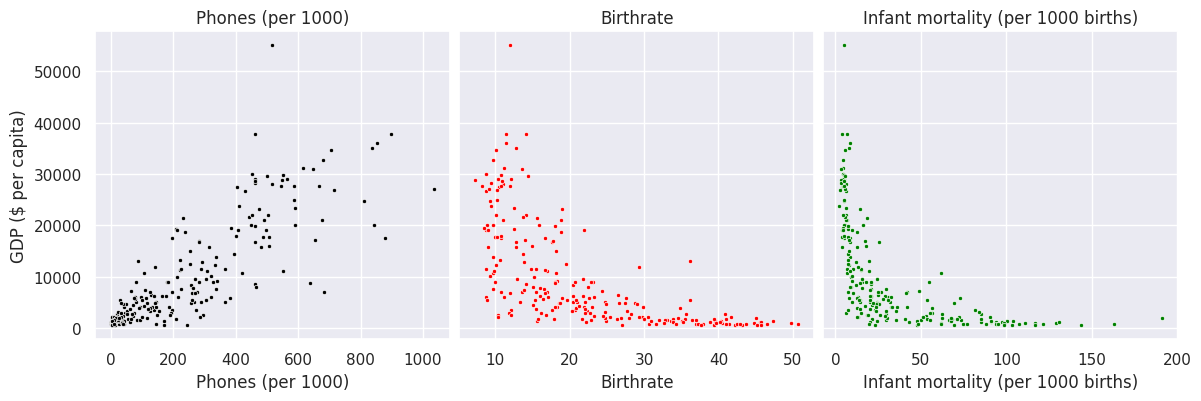

In [112]:
# Seleccionamos tres variables relevantes
phones           = df['Phones (per 1000)']
birthrate        = df['Birthrate']
infant_mortality = df['Infant mortality (per 1000 births)']
gdp              = df['GDP ($ per capita)']

# Definimos las dimensiones de la figura
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

## Usamos regplot para realizar un scatter con su linea de ajuste

# Graficamos 'phones'
sns.scatterplot(x=phones, y=gdp, color="black", marker='.', ax=axes[0])
axes[0].set_title('Phones (per 1000)')

# Gráficamos 'birthrate'
sns.scatterplot(x=birthrate, y=gdp, color="red", marker='.', ax=axes[1])
axes[1].set_title('Birthrate')

# Gráficamos 'infant_mortality'
sns.scatterplot(x=infant_mortality, y=gdp, color="green", marker='.', ax=axes[2])
axes[2].set_title('Infant mortality (per 1000 births)')

# Ajustamos la figura
plt.tight_layout()
plt.show()

### Pregunta 1.12

Cree una nueva columna `GDP (%)` que represente el GDP total de cada pais (no per capita) y agreguela al dataframe.

In [113]:
# Calcular el GDP % de cada pais
df['GDP ($)']   = df['GDP ($ per capita)'] * df['Population']
df['GDP Total'] = df['GDP ($)'].sum()
df['GDP (%)']   = df['GDP ($)'] / df['GDP Total']*100

df

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($),GDP Total,GDP (%)
0,2007,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060,163.070,700.0,...,87.65,1.0,46.600,20.340,0.380000,0.240000,0.380000,2.173990e+10,5.271149e+13,0.041243
1,2007,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930,21.520,4500.0,...,74.49,3.0,15.110,5.220,0.232000,0.188000,0.579000,1.611745e+10,5.271149e+13,0.030577
2,2007,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390,31.000,6000.0,...,96.53,1.0,17.140,4.610,0.101000,0.600000,0.298000,1.975805e+11,5.271149e+13,0.374834
3,2007,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.710,9.270,8000.0,...,75.00,2.0,22.460,3.270,0.175125,0.215250,0.608938,4.623520e+08,5.271149e+13,0.000877
4,2007,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.600,4.050,19000.0,...,97.78,3.0,8.710,6.250,0.044480,0.246083,0.714625,1.352819e+09,5.271149e+13,0.002566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2007,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.980,19.620,800.0,...,64.13,3.0,31.670,3.920,0.090000,0.280000,0.630000,1.968394e+09,5.271149e+13,0.003734
223,2007,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,-0.432,30.916,5460.0,...,99.98,1.0,20.814,4.806,0.135000,0.426200,0.400000,1.490624e+09,5.271149e+13,0.002828
224,2007,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.000,61.500,800.0,...,96.98,1.0,42.890,8.300,0.135000,0.472000,0.393000,1.716495e+10,5.271149e+13,0.032564
225,2007,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000,88.290,800.0,...,92.90,2.0,41.000,19.930,0.220000,0.290000,0.489000,9.201608e+09,5.271149e+13,0.017457


### Pregunta 1.13

Repita el análisis de correlaciones para `GDP ($)` excluyendo `GDP ($ per capita)` del análisis. ¿Cambian las variables que más correlacionan? Justifique.

In [121]:
# Selecionamos solo variables númericas para correlacionar y correlacionamos
df_corr2 = df.drop(columns=['GDP ($ per capita)'])

df_corr2 = df.select_dtypes(include=np.number).corr()["GDP ($)"]

# Ordenamos y luego convertimos a valor absoluto para identificar las variables con mayor correlación.
df_corr2 = df_corr2.abs()
df_corr2 = df_corr2.sort_values(ascending=False)
df_corr2[df_corr2.values < 1].head(4)




,GDP ($)
GDP (%),1.000000
Population,0.639528
Area (sq. mi.),0.556396
GDP ($ per capita),0.247954





---


Al realizar las correlación con el "GDP total" se puede observar en la tabla que una variable cambia, Phone por Agriculture, esta ultima variable tiene una correlacion positiva, es decir a mayor Agriculture, mayor GDP.

La agricultura se deriva del PIB, por lo tanto es normal que tenga una correlacion con ella misma.


---


### Pregunta 1.14

Detecte las observaciones outliers de las tres variables seleccionadas en la pregunta anterior. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

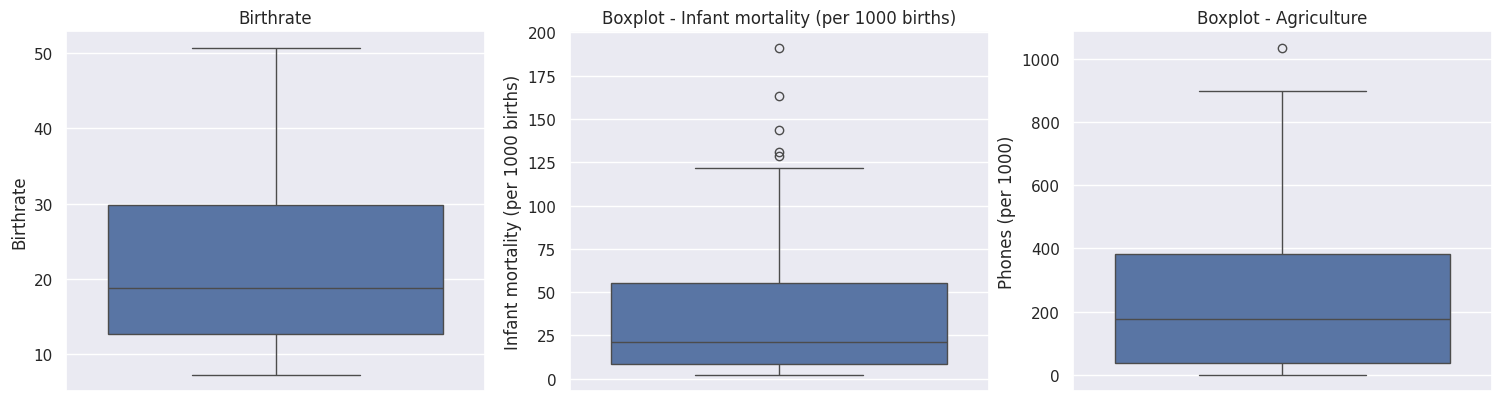

In [75]:
# Seleccionamos tres variables relevantes
birthrate   = df['Birthrate']
mortality   = df['Infant mortality (per 1000 births)']
agriculture = df['Agriculture']

# Definimos las dimensiones de la figura
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

## Usamos kdeplot, de igual forma se puede usar la libreria matplotlib

# Graficamos 'Birthrate'
sns.boxplot(birthrate, ax=axes[0])
axes[0].set_title('Birthrate')

# Gráficamos 'Infant Mortality'
sns.boxplot(mortality, ax=axes[1])
axes[1].set_title('Boxplot - Infant mortality (per 1000 births)')

# Gráficamos 'Agriculture'
sns.boxplot(phones, ax=axes[2])
axes[2].set_title('Boxplot - Agriculture')

# Ajustamos la figura
plt.tight_layout()
plt.show()


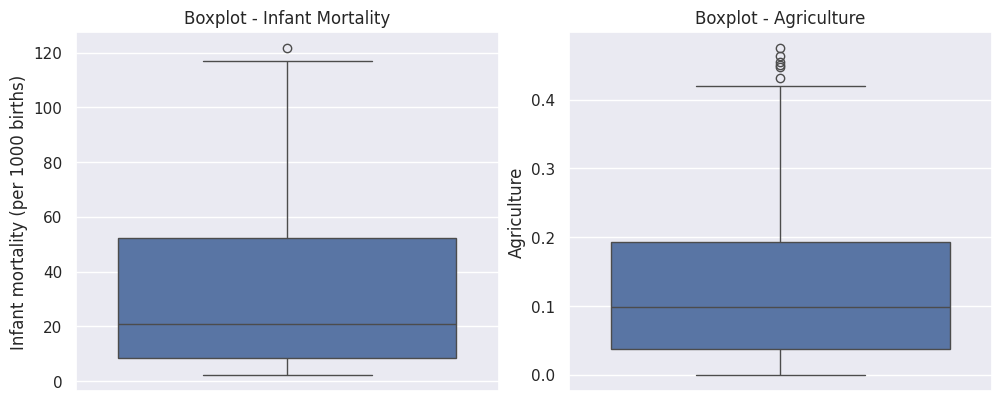

In [76]:
# Función para reemplazar solo los outliers con la mediana
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()

    # Solo se reemplazan los outliers
    df[column] = df[column].apply(lambda x: median_value if (x < lower_bound or x > upper_bound) else x)

    return df

# Aplicamos la función a las columnas
for col in ['Infant mortality (per 1000 births)', 'Agriculture']:
    df = replace_outliers_with_median(df, col)

# Graficamos los boxplots después del reemplazo
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(y=df['Infant mortality (per 1000 births)'], ax=axes[0])
axes[0].set_title('Boxplot - Infant Mortality')

sns.boxplot(y=df['Agriculture'], ax=axes[1])
axes[1].set_title('Boxplot - Agriculture')

plt.tight_layout()
plt.show()




---


*Escriba* su **justificación** en esta celda...


---



### Pregunta 1.15

En los ejemplos anteriores calculamos correlaciones para `GDP ($ per capita)` y `GDP ($)`. Genere un nuevo dataframe que tenga le variación porcentual de la correlación absoluta para cada una de las columnas de características, e.g., si la correlación en valor absoluto de `GDP ($ per capita)` vs `Industry` es 0.1 y la correlación `GDP ($)` vs `Industry` es 0.5, la variación deberá ser +500%. Dicha variación porcentual puede ser positiva o negativa, pero ordene los el dataframe de tal manera que la variación de correlación absoluta sea desendiente.

In [77]:
# Fusionamos nuestros resultados de correlaciones
df2 = pd.merge(df_corr1, df_corr2, left_index=True, right_index=True)

# Calculamos la variación % de la correlación y lo ordenamos de forma descedente
df2['Dif. Corr (%)'] = (df2['GDP ($ per capita)'] - df2['GDP ($)'])/ df2['GDP ($)']*100
df2 = df2.sort_values(by='Dif. Corr (%)', ascending=False)
df2

,GDP ($ per capita),GDP ($),Dif. Corr (%)
Net migration,0.383707,0.055508,591.259067
Pop. Density (per sq. mi.),0.196099,0.028487,588.387865
Service,0.553063,0.085856,544.176192
Deathrate,0.196066,0.035793,447.776480
Literacy (%),0.515455,0.102247,404.127262
Infant mortality (per 1000 births),0.596963,0.122662,386.672004
Agriculture,0.584562,0.141690,312.563906
Birthrate,0.643247,0.166856,285.510439
Phones (per 1000),0.830684,0.233041,256.453380
Climate,0.378147,0.114778,229.461160


### Pregunta 1.16

Del resultado anterior, ¿qué caracerística del país tuvo una mayor diferencia absoluta el medir su correlación versus `GDP ($)` en vez de `GDP ($ per capita)`'. Interprete.




---

De acuerdo con los resultados que muestran en la tabla la variable con mayor diferencia absoluta es 'Net migration' con un variación positva de 600%, seguida de Pop. Density (per sq. mi.) con una varación de 581%.

Por el contrario, el indicador que muestra una varación negativa es Population con un redución de 93%.

---





## EDA con diferentes fuentes de **información**


Una situación habitual en _Data Science: es el manejo de información de múltiples fuentes para un mismo propósito. En este sentido, de ahora en adelante agregaremos un dataframe adicional a nuestro set de información, disponible en [Github](https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv). Lo llamaremos `df_gini`.

Este dataset contiene información histórica del Índice de Gini (economía), el cual captura la desigualdad económica entre los quintiles de cada país. A mayor índice Gini, más desigual es un país en términos de ingresos. Para mayor información sobre los datos, puede dirigirse al [Repositorio](https://github.com/datasets/gini-index) completo. Para conocer más sobre el índice, una navegación por [Wikipedia](https://en.wikipedia.org/wiki/Gini_coefficient) debería ser suficiente.

### Pregunta 2.0

Cargue la base datos, asegúrese de que la variable de año esté en un formato de "fecha", y usando el diccionario de mapeo por inconsistencias de nombres, `country_name_mapping`, encuentre la forma de realizar un INNER JOIN entre ambas tablas, usando el nombre del país y el año de la observación como variables por las cuales hacer el JOIN. En el diccionario `country_name_mapping`, _keys_ corresponden a los valores de la tabla `df_gini` y _values_ a los de `df`.

Llame al dataframe resultante `df_merged`.

Si usted no se ha percatado, los nombres en la columna `Country` de `df` poseen espacios al final de estos. Elimine los espacios antes de realizar el INNER JOIN de interés (Hint: existe una función propia de las variables tipo `string` que realiza la labor de eliminar espacios al final de la palabra).



In [78]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping = {
    "Bahamas": "Bahamas, The",
    "Bosnia and Herzegovina": "Bosnia & Herzegovina",
    "Myanmar": "Burma",
    "Cape Verde": "Cabo Verde",
    "Central African Republic": "Central African Rep.",
    "Congo, Rep.": "Congo, Repub. of the",
    "Czechia": "Czech Republic",
    "Timor-Leste": "East Timor",
    "Egypt, Arab Rep.": "Egypt",
    "West Bank and Gaza": "Gaza Strip",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Dem. People's Rep.": "Korea, North",
    "Korea, Rep.": "Korea, South",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "North Macedonia": "Macedonia",
    "Micronesia, Fed. Sts.": "Micronesia, Fed. St.",
    "Russian Federation": "Russia",
    "St. Kitts and Nevis": "Saint Kitts & Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Slovak Republic": "Slovakia",
    "Eswatini": "Swaziland",
    "Syrian Arab Republic": "Syria",
    "Trinidad and Tobago": "Trinidad & Tobago",
    "Turkiye": "Turkey",
    "Venezuela, RB": "Venezuela",
    "Viet Nam": "Vietnam",
    "Yemen, Rep.": "Yemen"
}



In [79]:
# Cargamos la información correspondiente
url = 'https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv'
df_gini = pd.read_csv(url)
df_gini

,Country Name,Country Code,Year,Value
0,Albania,ALB,1996,27.0
1,Albania,ALB,2002,31.7
2,Albania,ALB,2005,30.6
3,Albania,ALB,2008,30.0
4,Albania,ALB,2012,29.0
...,...,...,...,...
2106,Zambia,ZMB,2015,55.8
2107,Zambia,ZMB,2022,51.5
2108,Zimbabwe,ZWE,2011,43.2
2109,Zimbabwe,ZWE,2017,44.3


In [80]:
# Formateamos la columna "Date"
df_gini["Year"] = pd.to_datetime(df_gini["Year"].astype(str), format="%Y").dt.year

# Remplazamos los nuevos nombres de paises
df_gini['Country'] = df_gini['Country Name'].replace(country_name_mapping)
df_gini['Country'] = df_gini['Country'].str.rstrip() # Eliminamos espacios en blanco redundantes
df_gini

,Country Name,Country Code,Year,Value,Country
0,Albania,ALB,1996,27.0,Albania
1,Albania,ALB,2002,31.7,Albania
2,Albania,ALB,2005,30.6,Albania
3,Albania,ALB,2008,30.0,Albania
4,Albania,ALB,2012,29.0,Albania
...,...,...,...,...,...
2106,Zambia,ZMB,2015,55.8,Zambia
2107,Zambia,ZMB,2022,51.5,Zambia
2108,Zimbabwe,ZWE,2011,43.2,Zimbabwe
2109,Zimbabwe,ZWE,2017,44.3,Zimbabwe


In [81]:
# Fuionamos los DataFrames "df" y "df_gini" mediante un inner join
df_merged = pd.merge(df, df_gini, left_on=['Country', 'date'], right_on=['Country', 'Year'], how='inner')
df_merged

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Agriculture,Industry,Service,GDP ($),GDP Total,GDP (%),Country Name,Country Code,Year,Value
0,2007,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,...,0.095,0.358,0.547,4.471245e+11,5.271149e+13,0.848249,Argentina,ARG,2007,46.3
1,2007,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,...,0.239,0.343,0.418,1.041730e+10,5.271149e+13,0.019763,Armenia,ARM,2007,31.2
2,2007,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,...,0.018,0.304,0.678,2.457864e+11,5.271149e+13,0.466286,Austria,AUT,2007,30.6
3,2007,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,...,0.093,0.316,0.591,6.278737e+10,5.271149e+13,0.119115,Belarus,BLR,2007,29.6
4,2007,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,...,0.010,0.240,0.749,3.020308e+11,5.271149e+13,0.572989,Belgium,BEL,2007,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2007,Thailand,ASIA (EX. NEAR EAST),64631595,514000,125.7,0.63,0.00,20.48,7400.0,...,0.099,0.441,0.460,4.782738e+11,5.271149e+13,0.907343,Thailand,THA,2007,39.8
63,2007,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,...,0.187,0.452,0.361,2.522384e+11,5.271149e+13,0.478526,Ukraine,UKR,2007,27.0
64,2007,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,...,0.005,0.237,0.758,1.678874e+12,5.271149e+13,3.185024,United Kingdom,GBR,2007,34.4
65,2007,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,...,0.010,0.204,0.787,1.128119e+13,5.271149e+13,21.401769,United States,USA,2007,40.8


### Pregunta 2.1

Repita el ejercicio de la obtención de un ranking para las correlaciones absolutas, tal como lo hizo para el GDP per cápita. ¿Cuáles son las relaciones que más le sorprenden? ¿Cuáles son las que están en línea con lo que esperaba? Justifique para ambos casos.





In [82]:
# Selecionamos solo variables númericas para correlacionar y correlacionamos
df_corr3 = df_merged.select_dtypes(include=np.number).corr()['Value']

# Ordenamos y luego convertimos a valor absoluto para identificar las variables con mayor correlación.
df_corr3 = df_corr3.sort_values(ascending=False).abs()
df_corr3[df_corr3.values <=1]

,Value
Value,1.000000
Birthrate,0.377369
Other (%),0.281669
Infant mortality (per 1000 births),0.220449
Agriculture,0.216623
Area (sq. mi.),0.206807
Crops (%),0.133987
Population,0.097588
GDP (%),0.046118
GDP ($),0.046118




---


*Escriba* su respuesta y justificación en esta celda...

---





Finalmente, agregaremos una tercera base de datos al análisis, también disponible en [Github](https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv) con su repectivo
[Repositorio](https://github.com/datasets/co2-fossil-by-nation). Esta contiene emisiones de dióxido de carbono (CO2) total y por fuentes, desagregado por país. La base de datos contiene datos desde el siglo XVI y la frecuencia es anual.



### Pregunta 2.2

Cargue la base de datos llamándola `df_co2`. Asegúrese de que todas las variables estén en su correcto formato (años deben estar en un formato de fecha). ¿Qué cuidados identifica usted que debiésemos tener al momento de observar valores nulos en esta base de datos?

Adicionalmente, para cada palabra en la columna `Country`, asegúrese de que la primera letra siempre sea mayúscula y que el resto de letras sean minúsculas (Hint: revise `methods` propios de las variables tipo `string`).

Luego, reemplace valores en `df_co2["Country"]` según el mapping otorgado. En el diccionario `country_name_mapping_co2`, _keys_ corresponden a los valores de la tabla `df_co2` y _values_ a los de `df`.




In [83]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping_co2 = {
    "United States Of America": "United States",
    "France (Including Monaco)": "France",
    "Italy (Including San Marino)": "Italy",
    "Plurinational State Of Bolivia": "Bolivia",
    "Federal Republic Of Germany": "Germany",
    "Former German Democratic Republic": "Germany",
    "Republic Of Moldova": "Moldova",
    "United Republic Of Tanzania": "Tanzania",
    "Japan (Excluding The Ruyuku Islands)": "Japan",
    "Hong Kong Special Adminstrative Region Of China": "Hong Kong",
    "Peninsular Malaysia": "Malaysia",
    "Democratic Republic Of The Congo (Formerly Zaire)": "Congo, Dem. Rep.",
    "Brunei (Darussalam)": "Brunei",
    "Myanmar (Formerly Burma)": "Burma",
    "Syrian Arab Republic": "Syria",
    "Islamic Republic Of Iran": "Iran",
    "Republic Of Korea": "Korea, South",
    "Democratic People S Republic Of Korea": "Korea, North",
    "Russian Federation": "Russia",
    "Viet Nam": "Vietnam",
    "Yemen": "Yemen, Rep.",
    "Trinidad And Tobago": "Trinidad & Tobago",
    "Bahamas": "Bahamas, The",
    "Micronesia": "Micronesia, Fed. St.",
    "Slovakia": "Slovakia",
    "St. Vincent & The Grenadines": "Saint Vincent and the Grenadines",
    "Saint Lucia": "Saint Lucia",
    "Antigua & Barbuda": "Antigua & Barbuda",
    "Saint Kitts-Nevis-Anguilla": "Saint Kitts & Nevis",
    "Netherland Antilles And Aruba": "Netherlands Antilles",
    "Timor-Leste (Formerly East Timor)": "East Timor",
    "Macau Special Adminstrative Region Of China": "Macau",
    "Republic Of Cameroon": "Cameroon",
    "Republic Of Sudan": "Sudan",
    "Lao People S Democratic Republic": "Laos",
    "Libyan Arab Jamahiriyah": "Libya",
    "Cote D Ivoire": "Cote d'Ivoire",
    "British Virgin Islands": "British Virgin Is.",
    "Faeroe Islands": "Faroe Islands",
    "China (Mainland)": "China",
}


In [84]:
# Cargamos la información sobre emisiones de CO2
url = 'https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv'
df_co2 = pd.read_csv(url)
df_co2

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552.0,0.0,0.0,0.0,NaN,NaN,0.0
1,1752,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
2,1753,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
3,1754,UNITED KINGDOM,2554,2554.0,0.0,0.0,0.0,NaN,NaN,0.0
4,1755,UNITED KINGDOM,2555,2555.0,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
18764,2020,VIET NAM,94323,58902.0,18906.0,4621.0,11894.0,NaN,0.980455,855.0
18765,2020,WALLIS AND FUTUNA ISLANDS,7,NaN,7.0,NaN,NaN,NaN,0.574098,1.0
18766,2020,YEMEN,2569,78.0,2213.0,70.0,208.0,NaN,0.080461,81.0
18767,2020,ZAMBIA,2240,704.0,1223.0,NaN,313.0,NaN,0.120065,15.0


In [85]:
# Formateamos la columna "Year"
df_co2["Year"] = df_co2["Year"].astype(int)

# Modificamos la variables Country para matchear con el diccionario ()
df_co2['Country'] = df_co2['Country'].str.casefold()  # Convertimos los string de la columna en tipo lower
df_co2['Country'] = df_co2['Country'].str.title()     # Transformamos la primera letra de cada palabra en tipo upper

# Asignamos el diccionario a nuestro df remplazando con el diccionario mapeado
df_co2['Country'] = df_co2['Country'].replace(country_name_mapping_co2)
df_co2

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,United Kingdom,2552,2552.0,0.0,0.0,0.0,NaN,NaN,0.0
1,1752,United Kingdom,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
2,1753,United Kingdom,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
3,1754,United Kingdom,2554,2554.0,0.0,0.0,0.0,NaN,NaN,0.0
4,1755,United Kingdom,2555,2555.0,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
18764,2020,Vietnam,94323,58902.0,18906.0,4621.0,11894.0,NaN,0.980455,855.0
18765,2020,Wallis And Futuna Islands,7,NaN,7.0,NaN,NaN,NaN,0.574098,1.0
18766,2020,"Yemen, Rep.",2569,78.0,2213.0,70.0,208.0,NaN,0.080461,81.0
18767,2020,Zambia,2240,704.0,1223.0,NaN,313.0,NaN,0.120065,15.0


In [86]:
# Reporte de valores faltantes por columna
reporte_nan = df_co2.isna().sum().sort_values(ascending=False)

# Opcional: también puedes agregar el porcentaje de NaNs
reporte_nan_pct = (df_co2.isna().mean() * 100).sort_values(ascending=False)

# Combinar en un DataFrame limpio
reporte = pd.DataFrame({
    'n° faltantes': reporte_nan,
    'faltante (%)': reporte_nan_pct
})
reporte

,n° faltantes,faltante (%)
Gas Flaring,16093,85.742448
Gas Fuel,8158,43.465289
Solid Fuel,5691,30.321274
Per Capita,5524,29.431509
Liquid Fuel,619,3.297991
Cement,517,2.754542
Bunker fuels (Not in Total),289,1.539773
Year,0,0.000000
Country,0,0.000000
Total,0,0.000000


In [87]:
# Dado que la variable "Gas Flaring" presenta una tasa muy alta de valores no reportados (85%) procedemos a dropearlo
df_co2 = df_co2.drop(columns=['Gas Flaring'])



---


La variable Gas Flaring fue excluida del análisis debido a que presenta una tasa de valores faltantes superior al 85%. Esta elevada proporción compromete tanto la representatividad de la muestra como la validez de cualquier imputación posible, razón por la cual se optó por su eliminación del DataFrame.

---



### Pregunta 2.3

En un mismo gráfico, grafique las series de emisiones totales de CO2 para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Brasil
- China
- Japón
- India


Para cada serie, añada una leyenda con el nombre del país.


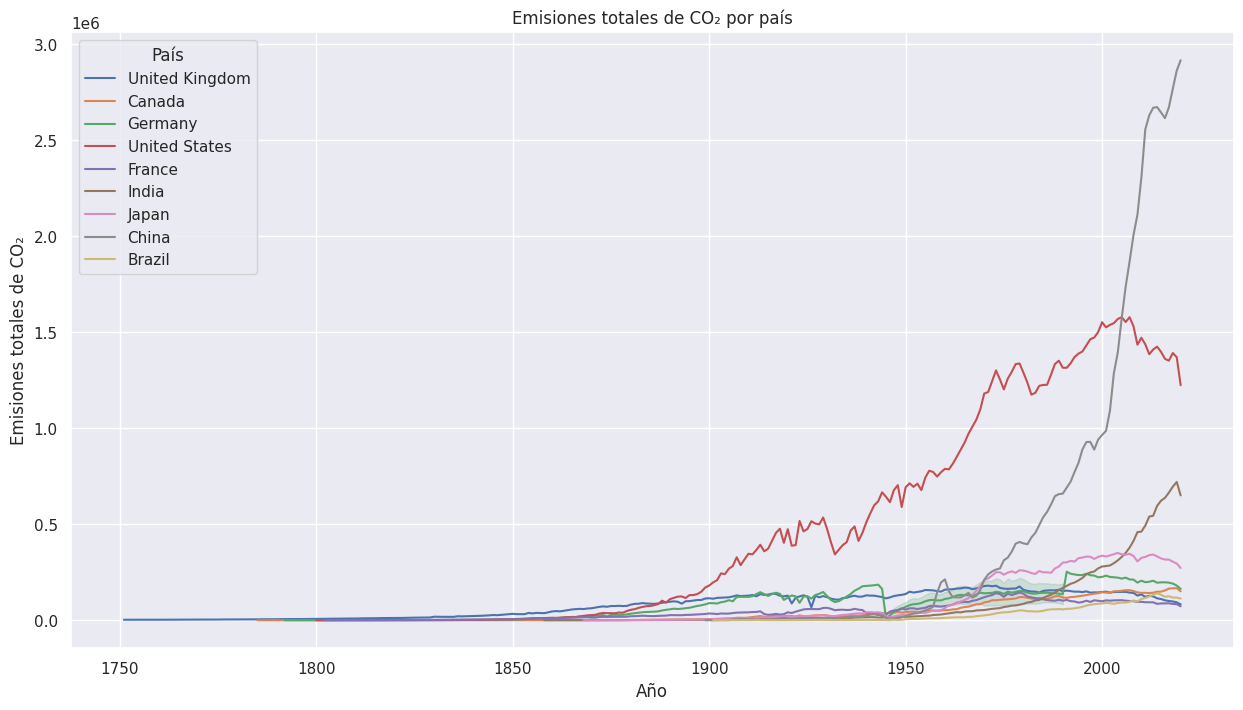

In [88]:
# Lista de países a graficar
paises = [
    'United Kingdom', 'Canada', 'Germany', 'France',
    'United States', 'Brazil', 'China', 'Japan', 'India'
]

# Filtrar el DataFrame para conservar únicamente los países de interés
df_filtrado = df_co2[df_co2['Country'].isin(paises)]

# Graficar las series con seaborn, diferenciando por país
fig, axes = plt.subplots(1,1, figsize=(15, 8))
sns.lineplot(data=df_filtrado, x='Year', y='Total', hue='Country')

# Personalizar la gráfica
plt.xlabel('Año')
plt.ylabel('Emisiones totales de CO₂')
plt.title('Emisiones totales de CO₂ por país')
plt.legend(title='País')
plt.show()

### Pregunta 2.4

Para el año 2007, por cada país realice un ranking de las fuentes con más emisiones de CO2 excluyendo las variables `Per Capita` y `Bunker fuels (Not in Total)`. Es decir, asigne un número de 1 a 5 a $\{$ `Solid Fuel`, `Liquid Fuel`, `Gas Fuel`, `Cement`, `Gas Flaring` $\}$, donde 1 es la mayor fuente de emisión de ese país en aquel año, y 5 indica que fue la menor; así para todos los países.

Si en 2007 no se reporta una fuente de emisión para un país, por ejemplo, si emisiones de `Gas Flaring` no se reportara, entonces asigne números de 1 a 4 a las fuentes restantes. Análogo para un menor número de datos.

Luego, por cada variable grafique un histograma de frecuencias del ranking que obtuvo la fuente emisión a lo largo de todos los países.

¿Cuál fue la fuente más contaminante en la mayoría de países en 2007?


In [89]:
# Filtramos solo el año de interes
df_co2_2007 = df_co2[df_co2['Year'] == 2007]

# Excluimos las variables "Per Capita"	"Bunker fuels (Not in Total)"
df_co2_2007 = df_co2_2007.drop(columns=['Per Capita', 'Bunker fuels (Not in Total)'])

# Creamos un df temporal con solo las variables de interes para el ranking
temp= df_co2_2007.drop(columns=['Year', 'Country', 'Total'])

# Calculamos el ranking por fila (axis=1), de mayor a menor, usando el método 'min' para desempates.
# De esta forma, la fuente con mayor emisión obtiene el ranking 1.
ranks = temp.rank(method='min', axis=1, ascending=False)

# Asignamos cada ranking a una nueva columna en el DataFrame original
df_co2_2007['Solid Fuel rank']      = ranks['Solid Fuel']
df_co2_2007['Liquid Fuel rank']     = ranks['Liquid Fuel']
df_co2_2007['Gas Fuel rank']        = ranks['Gas Fuel']
df_co2_2007['Cement rank']          = ranks['Cement']


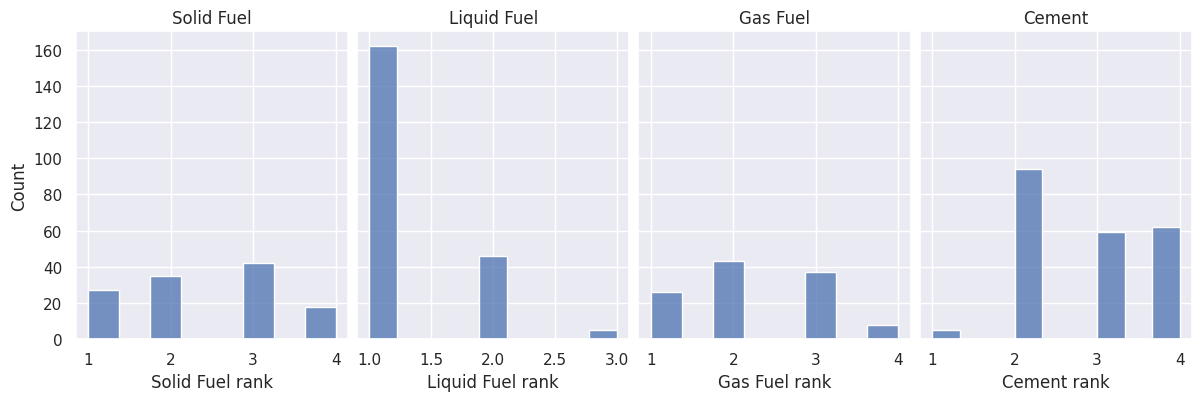

In [90]:
# Definimos las dimensiones de la figura
fig, axes = plt.subplots(1,4, figsize=(12, 4), sharey=True)

## Graficamos para las cinco fuentes de emisión de CO2

# Graficamos 'Solid Fuel'
sns.histplot(x=df_co2_2007['Solid Fuel rank'], ax=axes[0])
axes[0].set_title('Solid Fuel')

# Gráficamos 'Liquid Fuel'
sns.histplot(x=df_co2_2007['Liquid Fuel rank'], ax=axes[1])
axes[1].set_title('Liquid Fuel')

# Gráficamos 'Gas Fuel'
sns.histplot(x=df_co2_2007['Gas Fuel rank'], ax=axes[2])
axes[2].set_title('Gas Fuel')

# Gráficamos 'Cement'
sns.histplot(x=df_co2_2007['Cement rank'], ax=axes[3])
axes[3].set_title('Cement')

# Ajustamos la figura
plt.tight_layout()
plt.show()



---


*Escriba* su respuesta y justificación en esta celda...

---





### Pregunta 2.5

Para cada serie de total de emisiones por país, calcule el cambio porcentual a través del tiempo. Realice imputación de missings si considera necesario, justificando su imputación. Si no lo considera necesario, también justifique (se evaluará un buen criterio fundamentado).

Repita el ejercicio del gráfico de series de tiempo anterior, pero graficando los **cambios porcentuales** para años mayores o iguales a 1995. ¿Cómo interpretaría económicamente el shock sobre las emisiones de CO2 tanto en la crisis subprime como en la crisis del Covid-19?


In [91]:
# Ordenamos por "Country" y "Year"
df_co2 = df_co2.sort_values(['Country', 'Year'])

df_co2['Solid Fuel Growth Rate']  = df_co2.groupby('Country')['Solid Fuel'].pct_change(fill_method=None)*100
df_co2['Liquid Fuel Growth Rate'] = df_co2.groupby('Country')['Liquid Fuel'].pct_change(fill_method=None)*100
df_co2['Gas Fuel Growth Rate']    = df_co2.groupby('Country')['Gas Fuel'].pct_change(fill_method=None)*100
df_co2['Cement Growth Rate']      = df_co2.groupby('Country')['Cement'].pct_change(fill_method=None)*100
df_co2

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Per Capita,Bunker fuels (Not in Total),Solid Fuel Growth Rate,Liquid Fuel Growth Rate,Gas Fuel Growth Rate,Cement Growth Rate
4684,1949,Afghanistan,4,4.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
4770,1950,Afghanistan,23,6.0,18.0,0.0,0.0,0.003143,0.0,50.000000,inf,NaN,NaN
4930,1951,Afghanistan,25,7.0,18.0,0.0,0.0,0.003299,0.0,16.666667,0.000000,NaN,NaN
5090,1952,Afghanistan,25,9.0,17.0,0.0,0.0,0.003338,0.0,28.571429,-5.555556,NaN,NaN
5250,1953,Afghanistan,29,10.0,18.0,0.0,0.0,0.003701,0.0,11.111111,5.882353,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17880,2016,Zimbabwe,2876,1892.0,857.0,NaN,127.0,0.201038,33.0,-14.000000,-12.994924,NaN,-22.085890
18102,2017,Zimbabwe,2538,1529.0,881.0,NaN,129.0,0.173834,42.0,-19.186047,2.800467,NaN,1.574803
18324,2018,Zimbabwe,2923,1664.0,1108.0,NaN,151.0,0.196194,51.0,8.829300,25.766175,NaN,17.054264
18546,2019,Zimbabwe,2693,1520.0,1018.0,NaN,154.0,0.177098,44.0,-8.653846,-8.122744,NaN,1.986755


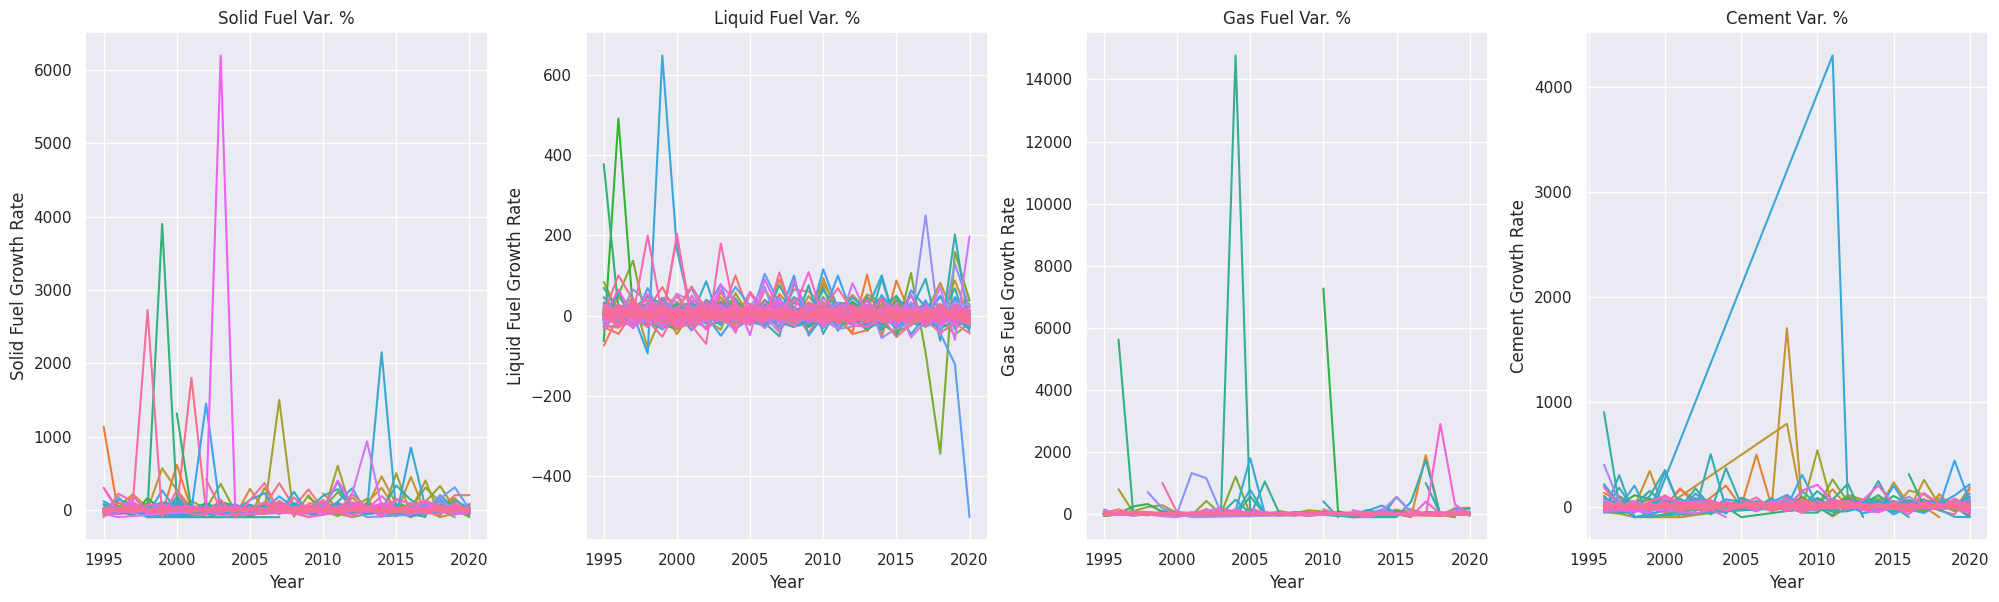

In [92]:
# Definimos las dimensiones de la figura
fig, axes = plt.subplots(1,4, figsize=(20, 6))

## Graficamos para las cinco fuentes de emisión de CO2

# Graficamos 'Solid Fuel'
sns.lineplot(data=df_co2[df_co2['Year'] >= 1995], x='Year', y='Solid Fuel Growth Rate', hue='Country', legend=False, ax=axes[0])
axes[0].set_title('Solid Fuel Var. %')

# Gráficamos 'Liquid Fuel'
sns.lineplot(data=df_co2[df_co2['Year'] >= 1995], x='Year', y='Liquid Fuel Growth Rate', hue='Country', legend=False, ax=axes[1])
axes[1].set_title('Liquid Fuel Var. %')

# Gráficamos 'Gas Fuel'
sns.lineplot(data=df_co2[df_co2['Year'] >= 1995], x='Year', y='Gas Fuel Growth Rate', hue='Country', legend=False, ax=axes[2])
axes[2].set_title('Gas Fuel Var. %')

# Gráficamos 'Cement'
sns.lineplot(data=df_co2[df_co2['Year'] > 1995], x='Year', y='Cement Growth Rate', hue='Country', legend=False, ax=axes[3]) # This also had a syntax error for the greater than sign
axes[3].set_title('Cement Var. %')

# Ajustamos la figura
plt.tight_layout()
plt.show()


---


*Escriba* su justificación e interpretación en esta celda...



---





### Pregunta 2.6

Calcule el promedio a lo largo de toda la muestra ($\mathbb{E}[\cdot]$) para el cambio porcentual de cada país y genere una nueva serie con la resta entre el cambio porcentual del país $i$ en el año $t$, y el promedio del cambio porcentual del país $i$. En otras palabras, genere una serie con _**desvíos del cambio porcentual promedio**_ $\forall i,t$:

$$Nueva Serie_i = \Delta \% TotalCO2_{i,t} - \mathbb{E}[{\Delta \% TotalCO2_{i,t}}]$$

Luego, para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Japón
- Italia
- España


grafique en un panel _1x2_ la desviación del cambio porcentual respecto al promedio entre 2007 y 2010 en lado izquierdo, y entre 2017 y 2020 en el lado derecho (Hint: Hay comandos que facilitan esta labor. Puede intentar con `fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)`, por ejemplo).

¿Existe algún país en particular que mostró mayores desviaciones atípicas de emisión de CO2 durante el periodo de la crisis sub-prime? ¿Cómo es el comportamiento de las desviaciones atípicas de CO2 de este país durante la crisis del Covid-19?


In [93]:
# Creamos la tasa de crecimiento de contaminación total, luego calculamos el promedio por país
df_co2['Total Growth Rate']       = df_co2.groupby('Country')['Total'].pct_change(fill_method=None)*100
df_co2['Mean Total Growth Rate']  = df_co2.groupby('Country')['Total Growth Rate'].transform('mean')

# Calculamos los desvíos del cambio porcentual promedio
df_co2['Delta Growth Rate']       = df_co2['Total Growth Rate'] - df_co2['Mean Total Growth Rate']
df_co2

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Per Capita,Bunker fuels (Not in Total),Solid Fuel Growth Rate,Liquid Fuel Growth Rate,Gas Fuel Growth Rate,Cement Growth Rate,Total Growth Rate,Mean Total Growth Rate,Delta Growth Rate
4684,1949,Afghanistan,4,4.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,15.675583,NaN
4770,1950,Afghanistan,23,6.0,18.0,0.0,0.0,0.003143,0.0,50.000000,inf,NaN,NaN,475.000000,15.675583,459.324417
4930,1951,Afghanistan,25,7.0,18.0,0.0,0.0,0.003299,0.0,16.666667,0.000000,NaN,NaN,8.695652,15.675583,-6.979931
5090,1952,Afghanistan,25,9.0,17.0,0.0,0.0,0.003338,0.0,28.571429,-5.555556,NaN,NaN,0.000000,15.675583,-15.675583
5250,1953,Afghanistan,29,10.0,18.0,0.0,0.0,0.003701,0.0,11.111111,5.882353,NaN,NaN,16.000000,15.675583,0.324417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17880,2016,Zimbabwe,2876,1892.0,857.0,NaN,127.0,0.201038,33.0,-14.000000,-12.994924,NaN,-22.085890,-14.097969,5.284604,-19.382573
18102,2017,Zimbabwe,2538,1529.0,881.0,NaN,129.0,0.173834,42.0,-19.186047,2.800467,NaN,1.574803,-11.752434,5.284604,-17.037038
18324,2018,Zimbabwe,2923,1664.0,1108.0,NaN,151.0,0.196194,51.0,8.829300,25.766175,NaN,17.054264,15.169425,5.284604,9.884821
18546,2019,Zimbabwe,2693,1520.0,1018.0,NaN,154.0,0.177098,44.0,-8.653846,-8.122744,NaN,1.986755,-7.868628,5.284604,-13.153232


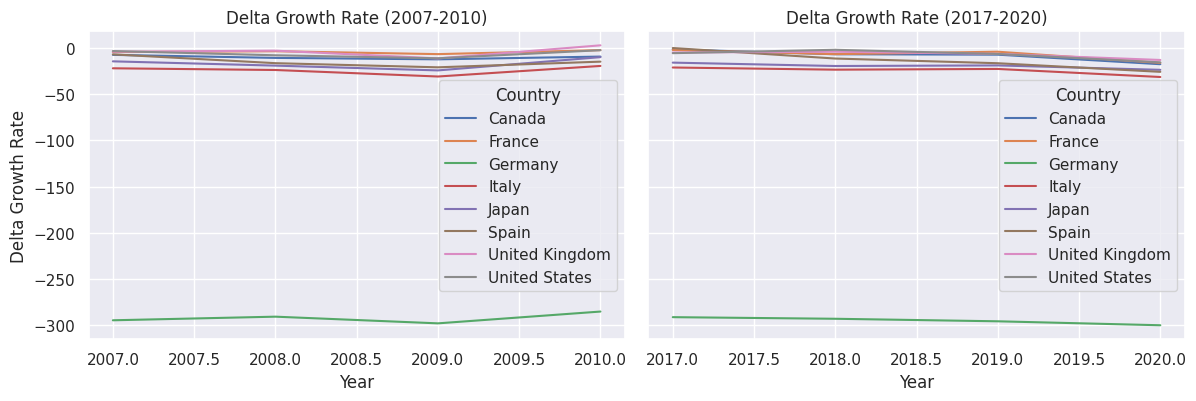

In [94]:
# Definimos las dimensiones de la figura
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Lista de países a graficar
paises = [
    'United Kingdom', 'Canada', 'Germany', 'France',
    'United States', 'Japan', 'Italy', 'Spain'
]

# Filtrar el DataFrame para conservar únicamente los países de interés
df_filtrado = df_co2[df_co2['Country'].isin(paises)]

# Graficar las series con seaborn, diferenciando por país
sns.lineplot(data=df_filtrado[(df_filtrado['Year'] >= 2007) & (df_filtrado['Year'] <= 2010)], x='Year', y='Delta Growth Rate', hue='Country',ax=axes[0])
axes[0].set_title('Delta Growth Rate (2007-2010)')

sns.lineplot(data=df_filtrado[(df_filtrado['Year'] >= 2017) & (df_filtrado['Year'] <= 2020)], x='Year', y='Delta Growth Rate', hue='Country', ax=axes[1])
axes[1].set_title('Delta Growth Rate (2017-2020)')

# Ajustamos la figura
plt.tight_layout()
plt.show()


---


*Escriba* su respuesta en esta celda...



---





### Pregunta 2.7

Genere un nuevo dataframe llamado `df_final`. Para esto, realice un INNER JOIN entre el dataframe `df_co2` y `df_merged` por "año y país" (debería terminar sólo con valores de 2007 si usted realiza un INNER JOIN).

Finalmente, grafique un mapa de calor de correlaciones (_heatmapt_) entre las variables numéricas ,excluyendo fechas.

¿Qué variables económicas, demográficas y de desarrollo humano muestran relación más importante con las emisiones de CO2? Interprete estas relaciones.


In [95]:
# Anexamos los dos dataframes indicados con inner join
df_final = pd.merge(df_co2, df_merged, left_on=['Year', 'Country'], right_on=['date', 'Country Name'], how='inner')
df_final.dtypes

,0
Year_x,int64
Country_x,object
Total,int64
Solid Fuel,float64
Liquid Fuel,float64
Gas Fuel,float64
Cement,float64
Per Capita,float64
Bunker fuels (Not in Total),float64
Solid Fuel Growth Rate,float64


In [96]:
# Eliminamos variables redudantes
corr_matrix = df_final.drop(columns=['Year_y', 'date', 'Year_x', 'GDP Total'])

# Calculamos la matriz de correlación
corr_matrix = corr_matrix.select_dtypes(include=np.number).corr()

# Variable de interés que mide el total de emisiones CO2
var_interes = 'Total'

# Reordenamos las columnas: la variable de interés  primero, luego el resto
ordered_cols = [var_interes] + [col for col in corr_matrix.columns if col != var_interes]

# Reordena tanto filas como columnas de la matriz
corr_matrix = corr_matrix.loc[ordered_cols, ordered_cols]
# Ordenamos
corr_matrix = corr_matrix.sort_values(by="Total",ascending=False).abs()
corr_matrix

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Per Capita,Bunker fuels (Not in Total),Solid Fuel Growth Rate,Liquid Fuel Growth Rate,Gas Fuel Growth Rate,...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($),GDP (%),Value
Total,1.000000,0.993620,0.996528,0.992350,0.844610,0.406385,0.898290,0.053343,0.073925,0.007023,...,0.036786,0.104002,0.111407,0.067628,0.180457,0.078798,0.215358,0.988365,0.988365,0.023302
Liquid Fuel,0.996528,0.983120,1.000000,0.986677,0.855491,0.394232,0.900582,0.051760,0.081505,0.009275,...,0.014704,0.092524,0.105823,0.087377,0.186950,0.085264,0.224747,0.990697,0.990697,0.046643
Solid Fuel,0.993620,1.000000,0.983120,0.979426,0.815093,0.400779,0.878224,0.048903,0.040718,0.010255,...,0.028840,0.087721,0.081526,0.048177,0.169453,0.114759,0.217976,0.972896,0.972896,0.047871
Gas Fuel,0.992350,0.979426,0.986677,1.000000,0.839473,0.416476,0.901915,0.126645,0.073254,0.009724,...,0.004769,0.069083,0.073400,0.085702,0.175521,0.167120,0.260771,0.983006,0.983006,0.047539
GDP ($),0.988365,0.972896,0.990697,0.983006,0.874097,0.393833,0.917595,0.059445,0.114245,0.013288,...,0.043848,0.121163,0.132681,0.080466,0.214177,0.088815,0.251418,1.000000,1.000000,0.028119
GDP (%),0.988365,0.972896,0.990697,0.983006,0.874097,0.393833,0.917595,0.059445,0.114245,0.013288,...,0.043848,0.121163,0.132681,0.080466,0.214177,0.088815,0.251418,1.000000,1.000000,0.028119
Bunker fuels (Not in Total),0.898290,0.878224,0.900582,0.901915,0.783851,0.431031,1.000000,0.075587,0.152558,0.030160,...,0.076072,0.180448,0.187230,0.082978,0.283243,0.157439,0.354305,0.917595,0.917595,0.037171
Cement,0.844610,0.815093,0.855491,0.839473,1.000000,0.312939,0.783851,0.086155,0.122429,0.028029,...,0.166541,0.058306,0.188492,0.139429,0.221850,0.107175,0.153594,0.874097,0.874097,0.017290
Population,0.702983,0.675136,0.714585,0.681654,0.864529,0.109245,0.615276,0.073852,0.010180,0.046050,...,0.048429,0.131010,0.004473,0.154612,0.035823,0.152440,0.027254,0.729935,0.729935,0.070934
Area (sq. mi.),0.627586,0.583990,0.651599,0.624664,0.621883,0.312590,0.482306,0.066697,0.073511,0.017939,...,0.219753,0.140711,0.016229,0.148551,0.072840,0.075856,0.040215,0.623910,0.623910,0.188444


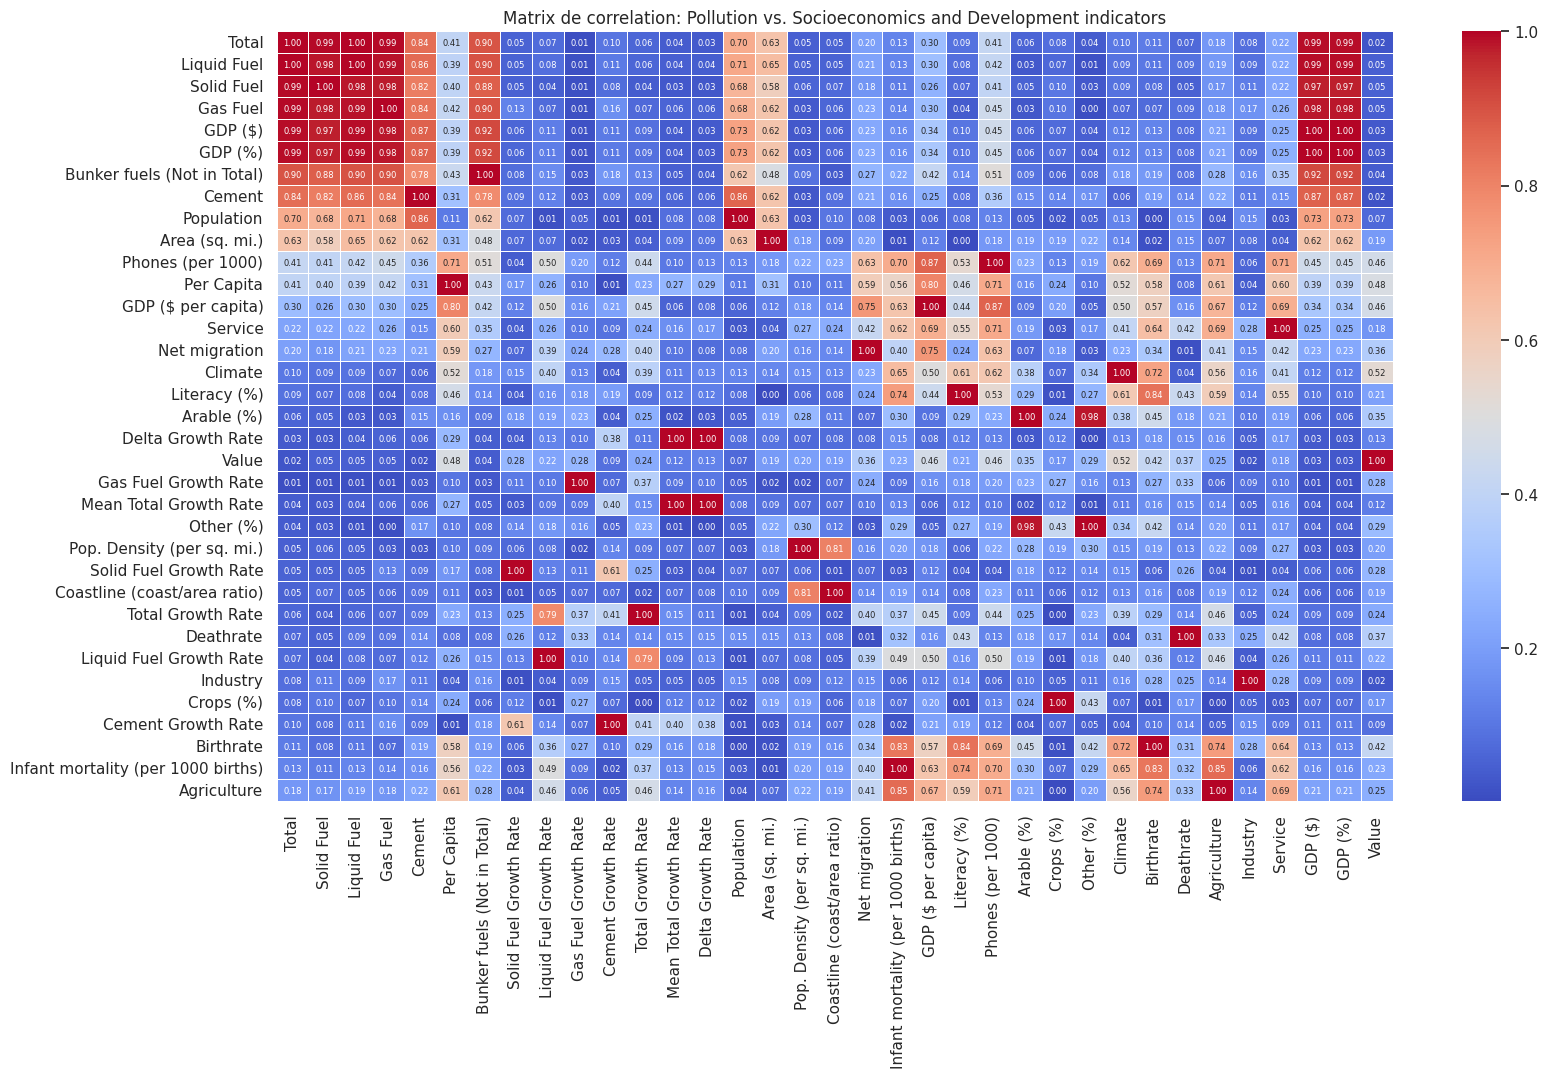

In [97]:
# Establecemos preferencias para el gráfico
sns.set_theme()
plt.rcParams['font.size'] = 6
f, ax = plt.subplots(figsize=(18, 10))

# Gráficamos un heatmap con las correlaciones
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",  linewidths=.5, ax=ax)
plt.title('Matrix de correlation: Pollution vs. Socioeconomics and Development indicators')
plt.show()

---


*Escriba* su respuesta e interpretación en esta celda...



---
